### Video No. 7

### Multivariate Linear Regression Example
Using combined powerplant data from the UCI Machine Learning Repository.

In [23]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [24]:
# fetch dataset 
combined_cycle_power_plant = fetch_ucirepo(id=294) 
# data (as pandas dataframes) 
X = combined_cycle_power_plant.data.features 
y = combined_cycle_power_plant.data.targets 
# metadata 
print(combined_cycle_power_plant.metadata) 
# variable information 
print(combined_cycle_power_plant.variables) 


{'uci_id': 294, 'name': 'Combined Cycle Power Plant', 'repository_url': 'https://archive.ics.uci.edu/dataset/294/combined+cycle+power+plant', 'data_url': 'https://archive.ics.uci.edu/static/public/294/data.csv', 'abstract': 'The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the plant was set to work with full load. ', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 9568, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['PE'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5002N', 'creators': ['Pnar Tfekci', 'Heysem Kaya'], 'intro_paper': {'ID': 406, 'type': 'NATIVE', 'title': 'Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods', 'aut

In [25]:
X.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [26]:
y.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
def linear_regression(X, y):
    X = np.array(X)
    y = np.array(y)
    # Adding a bias term (intercept)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
    theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    return theta_best

In [29]:
def fit(X, y):
    model = linear_regression(X, y)
    return model


In [30]:
betas = fit(X_train, y_train)
print("Betas (coefficients):", betas)


Betas (coefficients): [[ 4.54569115e+02]
 [-1.98589969e+00]
 [-2.32093577e-01]
 [ 6.21999093e-02]
 [-1.58117787e-01]]


In [31]:
y_predict = X_test @ betas[1:] + betas[0]  # y = X * betas + intercept
error = y_predict - y_test.to_numpy()
mse = np.mean(error ** 2)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.3f} MW")

RMSE: 4.503 MW


In [32]:
# new data
X_new = np.array([[12, 100, 32, 3.2,]])  # Example new data point
X_new_b = np.c_[np.ones((X_new.shape[0], 1)),X_new]  # add x0 = 1 to each instance
y_predict = X_new_b @ betas
print("Predicted value:", (y_predict[0][0]))
# Example usage
# X_new = np.array([[1, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02, 0.01]])  # Example new data point
# X_new_b = np.c_[np.ones((X_new.shape[0], 1)), X_new]  # add x0 = 1 to each instance
# y_predict = X_new_b @ betas
# print("Predicted value:", y_predict[0])

Predicted value: 409.01338068744985


In [33]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
print("Model coefficients (sklearn):", LR_model.coef_)


Model coefficients (sklearn): [[-1.98589969 -0.23209358  0.06219991 -0.15811779]]


In [35]:
X_new_sklearn = np.array([[12, 100, 32, 3.2]])
y_predict_sklearn_new = LR_model.predict(X_new_sklearn)
print("Predicted value (sklearn):", (y_predict_sklearn_new[0]))


Predicted value (sklearn): [409.01338068]


d:\Conda\envs\insta\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [36]:
y_predict_sklearn = LR_model.predict(X_test)
error_sklearn = y_predict_sklearn - y_test.to_numpy()
mse_sklearn = np.mean(error_sklearn ** 2)
rmse_sklearn = np.sqrt(mse_sklearn)
print("Predicted value (sklearn):", (y_predict_sklearn_new[0]))
print(f"Custom RMSE: {rmse:.4f} MW")
print(f"Sklearn RMSE: {rmse_sklearn:.4f} MW")

Predicted value (sklearn): [409.01338068]
Custom RMSE: 4.5026 MW
Sklearn RMSE: 4.5026 MW


In [37]:
# comparison of betas, rmse and predictions
print("Betas (custom):", betas)
print("Betas (sklearn):", LR_model.coef_, LR_model.intercept_)
print("RMSE (custom):", rmse)
print("RMSE (sklearn):", rmse_sklearn)


Betas (custom): [[ 4.54569115e+02]
 [-1.98589969e+00]
 [-2.32093577e-01]
 [ 6.21999093e-02]
 [-1.58117787e-01]]
Betas (sklearn): [[-1.98589969 -0.23209358  0.06219991 -0.15811779]] [454.56911459]
RMSE (custom): 4.5026332295467775
RMSE (sklearn): 4.502633229532185


In [38]:
X = np.array([1.2, 2.3, 3.1, 4.5, 4.9, 5.6, 6.7, 7.8, 8.9, 9.0])
y = np.array([2.4, 3.6, 4.8, 6.0, 7.2, 8.4, 9.6, 10.8, 12.0, 13.2])

In [39]:
def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    m_curr = b_curr = 0.0
    n = len(X)
    for i in range(num_iterations):
        y_predicted = m_curr * X + b_curr
        error = y - y_predicted
        cost = (1/n) * sum([val**2 for val in (error)]) # mean squared error
        if i % 6 == 0:
            print(f"Iteration {i}: Cost {cost}, m {m_curr}, b {b_curr}")
        md = -(2/n) * sum(X * (error))
        bd = -(2/n) * sum(error)
        m_curr -= learning_rate * md
        b_curr -= learning_rate * bd
    return m_curr, b_curr

In [40]:
m, b = gradient_descent(X, y, learning_rate=0.001, num_iterations=100)

Iteration 0: Cost 72.72000000000001, m 0.0, b 0.0
Iteration 6: Cost 29.286046392441378, m 0.5098278941410608, b 0.07819240926571072
Iteration 12: Cost 11.84536413168773, m 0.832845339248244, b 0.12805357463873102
Iteration 18: Cost 4.842102884722921, m 1.037485898529735, b 0.15996127878834968
Iteration 24: Cost 2.0299171267374043, m 1.1671141650446528, b 0.18049165781501333
Iteration 30: Cost 0.9006294458233249, m 1.2492091686353, b 0.1938118419198315
Iteration 36: Cost 0.44709832062095906, m 1.301183665291863, b 0.20256243606744523
Iteration 42: Cost 0.26491294617439953, m 1.3340716715239067, b 0.20841672534128722
Iteration 48: Cost 0.1916849227144422, m 1.3548651602847013, b 0.21243502903031938
Iteration 54: Cost 0.16220829533549108, m 1.3679947652285045, b 0.21528924572254346
Iteration 60: Cost 0.15030005654560996, m 1.3762680650096506, b 0.217405141769867
Iteration 66: Cost 0.1454465970382137, m 1.3814641499703844, b 0.2190525158377616
Iteration 72: Cost 0.14342624740110443, m 1.38

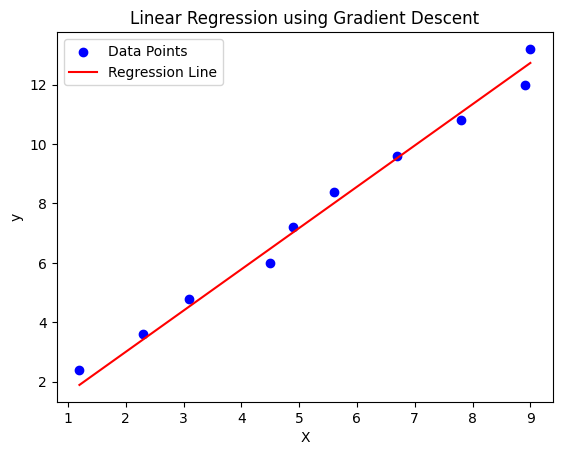

Betas:  1.3892619422408214 0.22506984156253418
RMSE:  0.376320237312945


In [41]:
y_predicted = m * X + b
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_predicted, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using Gradient Descent')
plt.legend()
plt.show()
# comparison of betas, rmse and predictions
print("Betas: ", m, b)
print("RMSE: ", np.sqrt(np.mean((y - y_predicted) ** 2)))
# --- IGNORE ---

Betas (sklearn): [1.3321267] 0.6065158371040749
RMSE (sklearn): 0.33861041563227307


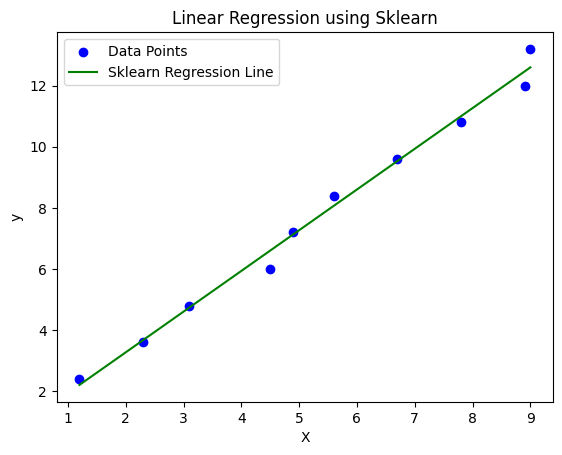

In [42]:
# sklearn regression model
from sklearn.linear_model import LinearRegression
X = X.reshape(-1, 1)  # Reshape for sklearn
LR_model = LinearRegression()
LR_model.fit(X, y)
y_predict_sklearn = LR_model.predict(X)
error_sklearn = y_predict_sklearn - y
mse_sklearn = np.mean(error_sklearn ** 2)
rmse_sklearn = np.sqrt(mse_sklearn)
print("Betas (sklearn):", LR_model.coef_, LR_model.intercept_)
print("RMSE (sklearn):", rmse_sklearn)
# comparison of betas, rmse and predictions
# visualize predictions
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_predict_sklearn, color='green', label='Sklearn Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression using Sklearn')
plt.legend()
plt.show()

In [43]:
comparison_df = pd.DataFrame({
    'X': X.flatten(),
    'y': y,
    'y_predicted_custom': y_predicted,
    'y_predicted_sklearn': y_predict_sklearn
})
display(comparison_df)

,X,y,y_predicted_custom,y_predicted_sklearn
0,1.2,2.4,1.892184,2.205068
1,2.3,3.6,3.420372,3.670407
2,3.1,4.8,4.531782,4.736109
3,4.5,6.0,6.476749,6.601086
4,4.9,7.2,7.032453,7.133937
5,5.6,8.4,8.004937,8.066425
6,6.7,9.6,9.533125,9.531765
7,7.8,10.8,11.061313,10.997104
8,8.9,12.0,12.589501,12.462443
9,9.0,13.2,12.728427,12.595656


In [44]:
import pickle
# Save the model
with open('models/dummy_linear_regression_model.pkl', 'wb') as file:
    pickle.dump(LR_model, file)
# Load the model
with open('models/dummy_linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
# Predict using the loaded model
y_predict_loaded = loaded_model.predict(X)
print("Predicted value (loaded model):", y_predict_loaded[0])


Predicted value (loaded model): 2.205067873303169


In [45]:
# trying joblib
import joblib
# Save the model
joblib.dump(LR_model, 'models/dummy_linear_regression_model.joblib')
# Load the model
loaded_model_joblib = joblib.load('models/dummy_linear_regression_model.joblib')
# Predict using the loaded model
y_predict_loaded_joblib = loaded_model_joblib.predict(X)
print("Predicted value (loaded model joblib):", y_predict_loaded_joblib[0])
# --- IGNORE ---

Predicted value (loaded model joblib): 2.205067873303169


In [46]:
data = {
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'size': ['S', 'M', 'L', 'M', 'S']
}
df = pd.DataFrame(data)
df_onehot = pd.get_dummies(df)
print(df_onehot)

   color_blue  color_green  color_red  size_L  size_M  size_S
0       False        False       True   False   False    True
1       False         True      False   False    True   False
2        True        False      False    True   False   False
3       False         True      False   False    True   False
4       False        False       True   False   False    True
